* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g

In [ ]:
####  Load Data / (Mining)

In [8]:
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
df_raw = pd.read_csv('King_County_House_prices_dataset.csv')

In [42]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Data Clean

In [ ]:
# TODO Not number checks
# TODO transform object


In [6]:
# date Object 
df_raw['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [ ]:
# TODO 
# extract sales_year and sales month as number


In [7]:
df_raw['sqft_basement'].head()
# TODO add feature to has basement 
# TODO transform make numerical

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [16]:
# waterfront
df_raw['waterfront'].head()

AttributeError: 'SeriesPlotMethods' object has no attribute 'scatter'

In [18]:
#df_raw['waterfront'].isnull()
#df_raw['waterfront'].unique()
# TODO Transform to 0 .or 1

df_raw[df_raw['waterfront'] == 1.].shape

(146, 21)

In [ ]:
df_raw['waterfront']

In [38]:
# what to do with lat long and zipcode ? 
# as the region shoul be be intresting 
# explore looking at zip and price
# https://www.kingcounty.gov/services/gis/Maps/vmc/Boundaries.aspx


#df_raw['zipcode'].value_counts()
#df_raw.plot.scatter(x='zipcode', y='price')
#df_raw.plot.scatter(x='long', y='price')
#df_raw.plot.scatter(x='lat', y='price')

# TODO try to get head map https://stackoverflow.com/questions/28651079/pandas-unstack-problems-valueerror-index-contains-duplicate-entries-cannot-re
#p = df_raw.pivot('long','lat','price')

ValueError: Index contains duplicate entries, cannot reshape

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


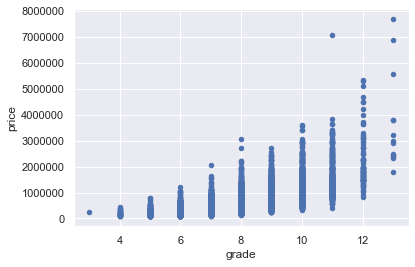

In [23]:
# grade system 
df_raw.plot.scatter(x='grade', y='price')
print(sorted(df_raw.grade.unique()))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[1, 2, 3, 4, 5]


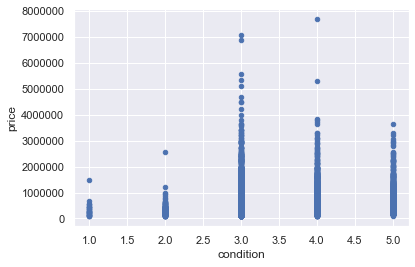

In [26]:
# condition
# what does it say should be scale from 1-5 but who grades this
print(sorted(df_raw.condition.unique())) # fits to discription

df_raw.plot.scatter(x='condition', y='price')

In [29]:
# check price range
print(df_raw.price.min())
# check price range
print(df_raw.price.max())
# TODO bin the data in price ranges


78000.0
7700000.0


# Size Factor

In [72]:
# check all the size values
#df_raw.info()
#sqft_living15
#sqft_lot15 - could be extendedn in group of renovataed ...?


#sqft_living - living room
#sqft_lot - grundstück
#sqft_above - all other floors
#sqft_basement - basement

df_raw[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','floors']].iloc[20:40]
# looks like colinearty between sqft_living and above and basment
# one could use ratio with floor

,sqft_living,sqft_lot,sqft_above,sqft_basement,floors
20,1620,4980,860,760.0,1.0
21,3050,44867,2330,720.0,1.0
22,2270,6300,2270,0.0,2.0
23,1070,9643,1070,0.0,1.0
24,2450,6500,2450,0.0,2.0
25,1710,4697,1710,0.0,1.5
26,2450,2691,1750,700.0,2.0
27,1400,1581,1400,0.0,1.5
28,1520,6380,790,730.0,1.0
29,2570,7173,2570,0.0,2.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


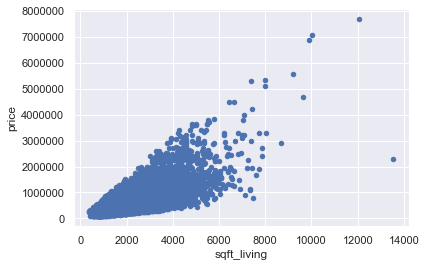

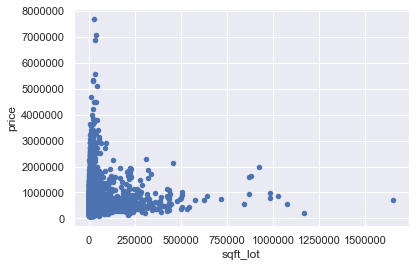

In [74]:
# sqft_living
df_raw.plot.scatter(x='sqft_living', y='price')
# goood correlation
df_raw.plot.scatter(x='sqft_lot', y='price')
# is there maybe farm style housings 

# AGE factor

2015


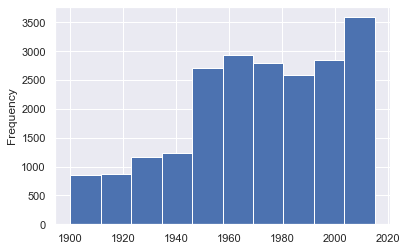

In [47]:
# building years
df_raw.yr_built.plot.hist()
print(df_raw.yr_built.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


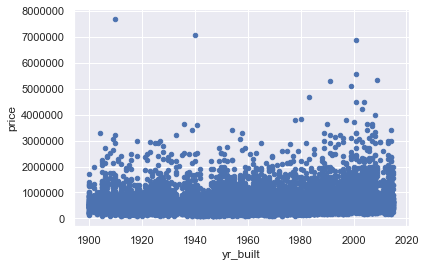

In [53]:
df_raw.plot.scatter(x='yr_built',y='price')
# outlyer could be historical buldings that are old
# newer ones could be very big or postion houses

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


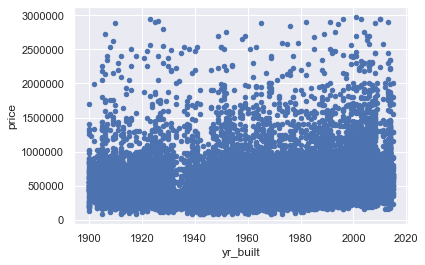

In [54]:
df_raw[df_raw.price < 3e6].plot.scatter(x='yr_built',y='price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


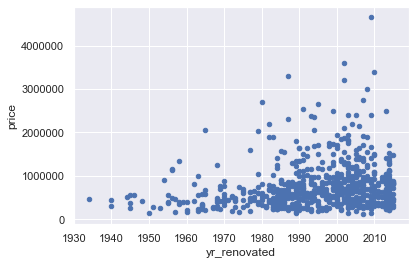

In [66]:
df_raw[(df_raw.price < 5e6) &(df_raw.yr_renovated >0)].plot.scatter(x='yr_renovated', y='price')


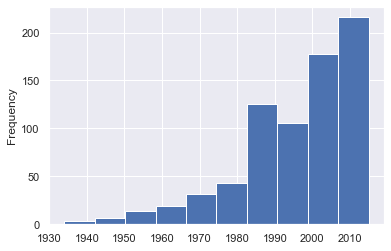

In [51]:
df_raw[df_raw.yr_renovated >0 ].yr_renovated.plot.hist()

In [ ]:
# TODO feature delta between renovation and build year
# -- try to find maybe a predictor for condtion in that

In [ ]:
# TODO is renovated at all
# what could be feature is new (build year, not renovated)
# 

In [ ]:
# catgoricals 


## Data Explore - general overview

## Bussiness Goal devlopment

In [ ]:
# wehn in the year to buy or sell...
# is this diffrent by (rigion - rigion could be difficult)

# advitising ... footage can it improve ( correlation with other features like at a price tag etc.)

# how good is the grade system

# sqft_living15Living could give indication on how much the price 
# increases if renovation adds sqr ... (check if enough data)

# ? condtion is waht exst - the delta to jump condtion impact on price
# ...


# get repredict the grade and condtion of a building or what
# the rating by the gov must be to increase price ...  ( value of effort)

## Data Explore for predictor model

In [83]:
import statsmodels.formula.api as smf

In [79]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [85]:
l = ['sqft_living', 'condition' ,'grade', \
     'yr_built','yr_renovated','lat' ,'long']

s = ''
for i in l:
    s += i + ' + '
s = s[:-3]
r = smf.ols(formula='price ~ %s' %s, data=df_raw).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     4625.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:30:07   Log-Likelihood:            -2.4358e+05
No. Observations:               17755   AIC:                         4.872e+05
Df Residuals:                   17747   BIC:                         4.872e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.039e+07   1.72e+06    -23.464      0.000   -4.38e+07    -3.7e+07
sqft_living    191.8104      2.841     67.511      0.000     186.241     197.379
condition     2.978e+04   2773.793     10.736      0.000    2.43e+04    3.52e+04
grade         1.195e+05   2367.824     50.460      0.000    1.15e+05    1.24e+05
yr_built     -2335.1793     76.243    -30.628      0.000   -2484.624   -2185.735
yr_renovated    43.9103      4.344     10.109      0.000      35.396      52.424
lat           5.354e+05   1.24e+04     43.185      0.000    5.11e+05     5.6e+05
long         -1.526e+05   1.31e+04    -11.685      0.000   -1.78e+05   -1.27e+05
==============================================================================
Omnibus:                    16582.495   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1813056.342
Skew:                           4.159   Prob(JB):                         0.00
Kurtosis:                      51.802   Cond. No.                     3.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual analytic

# prepare data fro real predctions 

In [89]:
# splitting data set
from sklearn.model_selection import train_test_split


In [87]:
y=df_raw.price
x=df_raw.drop('price',axis=1)
x.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
import statsmodels.api as sm


l = ['sqft_living', 'condition' ,'grade', \
     'yr_built','yr_renovated','lat' ,'long']

l = ['sqft_living', 'condition' ,'grade', \
     'yr_built','lat' ,'long']

l = ['sqft_living', 'condition' ,'grade', \
     'yr_built']

y = y_train
X = x_train[l]
#X = sm.add_constant(X)
#X.yr_renovated[X.yr_renovated.isnull()].apply(lambda x: 0).head()
X.head()
r = sm.OLS(y,X).fit()
#r = smf.ols(formula='price ~ %s' %s, data=df_raw).fit()
#r.summary()
y_hat =r.predict(x_test[l])
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                          2.684e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):                        0.00
Time:                        14:33:59   Log-Likelihood:                     -2.3883e+05
No. Observations:               17277   AIC:                                  4.777e+05
Df Residuals:                   17273   BIC:                                  4.777e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   170.0132      3.155     53.895      0.000     163.830     176.196
condition    6.616e+04   2805.585     23.581      0.000    6.07e+04    7.17e+04
grade        1.265e+05   2545.183     49.705      0.000    1.22e+05    1.31e+05
yr_built     -511.5610      9.725    -52.601      0.000    -530.623    -492.498
==============================================================================
Omnibus:                    13653.286   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           820911.921
Skew:                           3.330   Prob(JB):                         0.00
Kurtosis:                      36.106   Cond. No.                     4.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
l = ['sqft_living', 'condition' ,'grade', \
     'yr_built']


X = x_train[l]
X = sm.add_constant(X)

/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


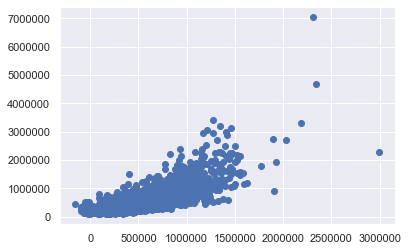

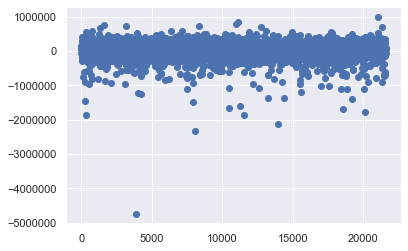

In [128]:
import matplotlib.pyplot as plt
plt.plot(y_hat,y_test, 'o')
plt.show()
plt.plot(y_hat-y_test,'o')

In [122]:
predict_res = y_hat-y_test

print(predict_res.std())
print(predict_res.mean())
print(y_test.std())

219453.33343303154
1493.806701825864
357288.76439000224


In [129]:
import numpy as np
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true = y_test, y_pred = y_hat)
np.sqrt(MSE)

240607.5714197074

# Model validation

# model compare